### [3차] 파일명 정렬(https://school.programmers.co.kr/learn/courses/30/lessons/17686)

In [ ]:
def solution(files):
    heads, numbers, tails = {}, {}, {}
    for idx, file in enumerate(files):
        head, number, tail = '', '', ''
        num_cnt = False
        for t in file:
            try : 
                int(t)
                if not num_cnt:
                    number += t
                else :
                    tail += t
            except : 
                if not number:
                    head += t
                else :
                    num_cnt = True
                    tail += t
        
        heads[idx] = head
        numbers[idx] = number
        tails[idx] = tail
    

In [ ]:
def solution(files):
    names = []
    for idx, file in enumerate(files):
        head, number, tail = '', '', ''
        num_cnt = False
        for t in file:
            try : 
                int(t)
                if not num_cnt:
                    number += t
                else :
                    tail += t
            except : 
                if not number:
                    head += t
                else :
                    num_cnt = True
                    tail += t
        
        names.append([head, number, tail, idx])
    
    names = sorted(names, key=lambda x: (x[0], int(x[1]), -int(x[3])))
    print(names)
    

In [ ]:
files = ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]
solution(files)

In [ ]:
def solution(files):
    names = []
    for idx, file in enumerate(files):
        head, number, tail = '', '', ''
        num_cnt = False
        for t in file:
            try : 
                int(t)
                if not num_cnt:
                    number += t
                else :
                    tail += t
            except : 
                if not number:
                    head += t
                else :
                    num_cnt = True
                    tail += t
        
        names.append([head, number, tail, idx])
    
    names = sorted(names, key=lambda x: (x[0].lower(), int(x[1]), int(x[3])))
    answer = [x1+x2+x3 for x1, x2, x3, _ in names]
    print(answer)

In [ ]:
files = ["img12.png", "img10.png", "img02.png", "img1.png", "IMG01.GIF", "img2.JPG"]
solution(files)

In [ ]:
files = ["F-5 Freedom Fighter", "B-50 Superfortress", "A-10 Thunderbolt II", "F-14 Tomcat"]
solution(files)

### [숫자 변환하기](https://school.programmers.co.kr/learn/courses/30/lessons/154538)

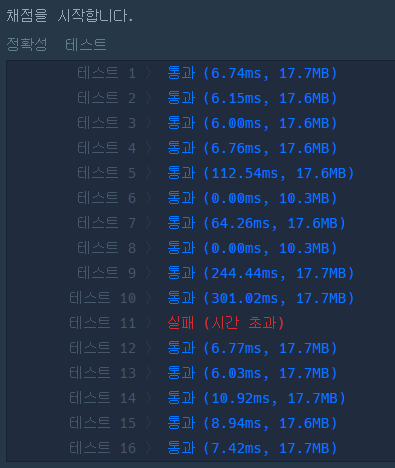

In [ ]:
def solution(x, y, n):
    cnt = 0
    if x == y:
        return cnt
    elif y in [x+n, x*2, x*3]:
        return cnt + 1

    stack = [(y, cnt)]
    visited = [1_000_000] * 1_000_001
    answer = float('inf')
    while stack:
        cur, cnt = stack.pop()
        if cnt < answer and cnt < visited[cur]:
            cnt += 1
            nexts = [int(k) for k in (cur-n, cur/2, cur/3) if int(k) == k and k >= x]
            if nexts :
                answer = cnt if x in nexts else answer
                targets = [(k, cnt) for k in nexts]
                stack = stack + targets
        stack = [(cur, cnt) for cur, cnt in stack if cnt < answer]
    return answer if answer != float('inf') else -1            

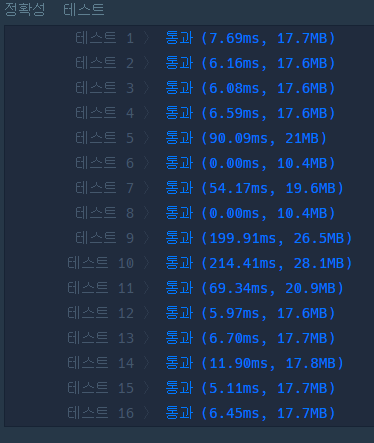

In [119]:
from collections import deque

def solution(x, y, n):
    cnt = 0
    if x == y:
        return cnt
    elif y in [x+n, x*2, x*3]:
        return cnt + 1

    queue = deque([(y, cnt)])
    visited = [1_000_000] * 1_000_001
    answer = float('inf')
    while queue:
        cur, cnt = queue.popleft()
        if cnt < answer and cnt < visited[cur]:
            cnt += 1
            nexts = [int(k) for k in (cur-n, cur/2, cur/3) if int(k) == k and k >= x]
            if nexts :
                answer = cnt if x in nexts else answer
                [queue.append((k, cnt)) for k in nexts]
    return answer if answer != float('inf') else -1            

- 다른 심플한 풀이?

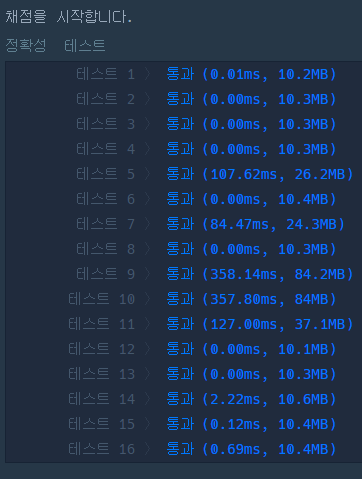

In [ ]:
def solution(x, y, n):
    answer = 0
    s = set()
    s.add(x)

    while s:
        if y in s:
            return answer

        nxt = set()
        for i in s:
            if i+n <= y:
                nxt.add(i+n)
            if i*2 <= y:
                nxt.add(i*2)
            if i*3 <= y:
                nxt.add(i*3)
        s = nxt
        answer+=1

    return -1

- 다른 사용자 코드를 기반으로 아래의 최적화를 진행
    - y에서 시작하는 것이 더 나음
    - list 컴프리헨션으로 반복문 최소화

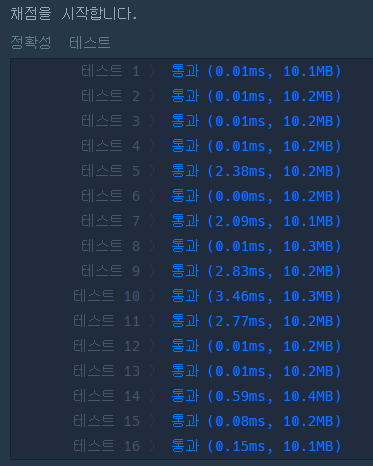

In [ ]:
def solution(x, y, n):
    answer = 0
    s = set()
    s.add(y)

    while s:
        if x in s:
            return answer

        nxt = set()
        for i in s:
            [nxt.add(k) for k in (i-n, i/2, i/3) if k >= x and int(k)==k]
        s = nxt
        answer+=1

    return -1

- history를 추가
    - 현재 수준의 데이터 사이즈나 복잡도를 고려하면 불필요한 조치
    - 다만, 사이즈가 커질수록 유용한 방법이 될 수도 있을 듯함

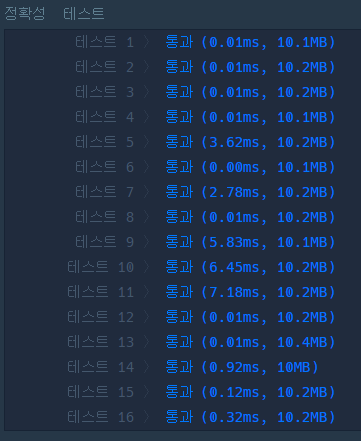

In [ ]:
def solution(x, y, n):
    answer = 0
    s = set()
    history = []
    s.add(y)
    history.append(y)

    while s:
        if x in s:
            return answer

        nxt = set()
        for i in s:
            [(nxt.add(k), history.append(k)) for k in (i-n, i/2, i/3) if k >= x and int(k)==k and k not in history]
        s = nxt
        answer+=1

    return -1

In [107]:
x = 2
y = 5
n = 4
solution(x, y, n)

-1

In [120]:
x = 10
y = 40
n = 5
solution(x, y, n)

40 0
20 1
10 2
15 2
35 1
30 2


2

In [102]:
x = 38
y = 40
n = 2
solution(x, y, n)

1

### 2018 KAKAO BLIND RECRUITMENT > [1차] [프렌즈4블록](https://school.programmers.co.kr/learn/courses/30/lessons/17679)

: 구성은 크게 사라질 블록을 찾는 것 + 블록을 지우고, 빈 자리를 채워 새로운 매트릭스를 구현하는 것 으로 구성  
  
1. 사라질 블록 찾기
- 반드시 2x2 사이즈의 동일한 블록이 있으면 되므로, (오른, 아래, 오른아래)를 탐색하는 식으로 진행   
  
    
2. 블록 지우고, 새로운 매트릭스를 구현
- visited에서 1에 해당하는 영역을 지우기 위해 열별로 체크해서, 새로운 리스트를 구현하고 해당 열의 길이와 안맞는만큼 제일 위(앞)에 '-'를 추가
- 해당 리스트를 이용해 기존 board를 업데이트  

3. 위 과정을 반복하며, 더이상 지울 블록이 없을 경우 종료

In [ ]:
def solution(m, n, board):
    answer = 0
    directions = [(0,1), (1,0), (1,1)]
    visited = [[0] * n for _ in range(m)]
    while True:
        for x in range(m-1):
            for y in range(n-1):
                if board[x][y] == '-':
                    continue
                block = board[x][y]
                blocks = [(x+dx, y+dy) for dx, dy in directions if board[x+dx][y+dy] == block]
                if len(blocks) == 3:
                    blocks.append((x, y))
                    for x, y in blocks:
                        visited[x][y] = 1
                        
        erase = sum((sum(x) for x in visited))
        if erase:    
            answer += erase
            string_board = [list(row) for row in board]
            # 열별로 확인
            for y in range(n):
                # 각 열에 대해 아래로 내려가면서 '1'인 위치를 찾고, 해당 위치 위의 블록을 내림
                temp_col = []
                for x in range(m):
                    if visited[x][y] == 0:
                        temp_col.append(string_board[x][y])

                # 위에서 아래로 빈 칸을 '-'로 채워서 업데이트
                while len(temp_col) < len(visited):
                    temp_col.insert(0, '-')  # 맨 위에 '-' 추가

                # 수집된 값들로 해당 열을 업데이트
                for x in range(len(visited)):
                    string_board[x][y] = temp_col[x]

            # 결과 문자 리스트를 문자열로 변환
            board = [''.join(row) for row in string_board]
            visited = [[0] * n for _ in range(m)]       
            
        else :
            return answer       

In [93]:
m = 4
n = 5
board = ["CCBDE", "AAADE", "AAABF", "CCBBF"]
solution(m, n, board)

Before:
Board:
['CCBDE', 'AAADE', 'AAABF', 'CCBBF']
answer:6
['C', 'C']
['-', 'C', 'C']
['C', 'C']
['-', 'C', 'C']
['B', 'B']
['-', 'B', 'B']
After:
Board:
['---DE', '---DE', 'CCBBF', 'CCBBF']
answer:6
Before:
Board:
['---DE', '---DE', 'CCBBF', 'CCBBF']
answer:14
['-', '-']
['-', '-', '-']
['-', '-']
['-', '-', '-']
['-', '-']
['-', '-', '-']
['D', 'D']
['-', 'D', 'D']
After:
Board:
['----E', '----E', '---DF', '---DF']
answer:14


14

### [2 x n 타일링](https://school.programmers.co.kr/learn/courses/30/lessons/12900?language=python3)

- 단순하게 진짜 타일 배치하는 케이스를 연산해서 풀어봄 -> 실행속도 이슈가 있음

In [20]:
from itertools import combinations

def solution(n):
    answer = 1 # 모두 세로로 놓는 경우
    cases = [len(list((combinations(range(n-x), x)))) for x in range(1, n//2+1)]
    print(cases)
    answer += sum(cases)
        
    return answer % 1_000_000_007

- f(n) = f(n-1) + f(n-2) 가 성립함을 인지하고 문제 풀이
1. lru_cache를 이용해 문제 풀이
  : 여전히 효율성 테스트 문제가 있음. 복잡한 문제여도 30ms 이내에 풀려야 함

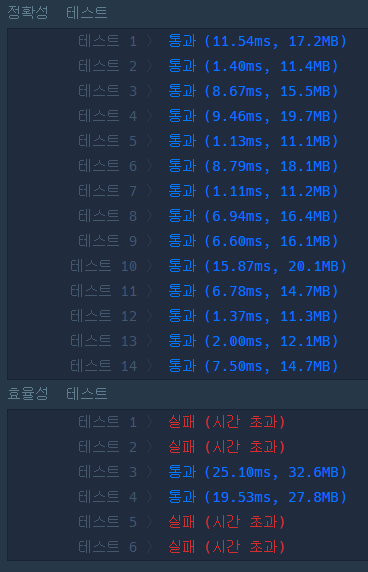

In [28]:
import sys
sys.setrecursionlimit(1_000_000)

from functools import lru_cache

@lru_cache(maxsize=300)
def fib(n):
    if n <= 2:
        return n
    return fib(n-1) + fib(n-2)

def solution(n):
    answer = fib(n) % 1_000_000_007
    return answer

2. deque를 이용해 문제 풀이

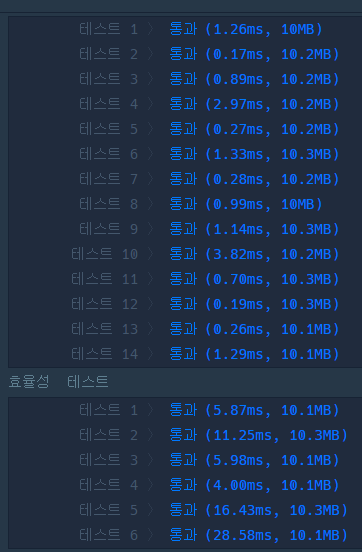

In [32]:
from collections import deque

def solution(n):
    if n <= 3:
        return n
    queue = deque([2,3])
    last = 3
    for _ in range(4, n+1):
        last += queue.popleft()        
        queue.append(last)
    return last % 1_000_000_007

3. 좀 더 간단하게 구현한 다른 사람들 코드

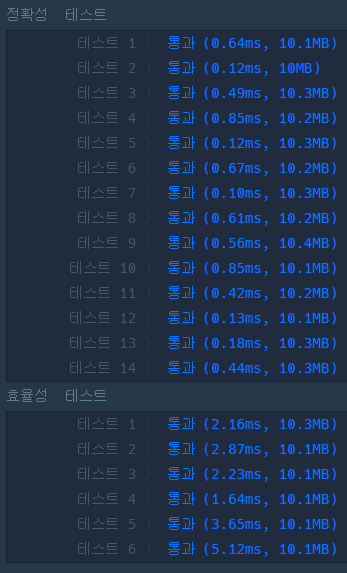

In [ ]:
def solution(n):
    if n <= 3:
        return n
    a, b = 2, 3
    for _ in range(4, n):
        a, b = b, (a + b) % 1000000007
    return b

In [33]:
solution(4)

deque([3, 5])


In [34]:
solution(7)

deque([3, 5])
deque([5, 8])
deque([8, 13])
deque([13, 21])


In [12]:
from itertools import combinations

n = 9
for i in range(1, n // 2 + 1):
    target = len(list(combinations(range(n-i), i)))
    print(target)

8
21
20
5


In [13]:
combinations(4,3)

TypeError: 'int' object is not iterable